<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

### Смотрю размер датафрейма

In [4]:
data.shape

(5282, 20)

### Вывожу первые 10 строк, чтобы посмотреть на вид данных

In [5]:
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


### Вывожу строки из случайного диапазона

In [6]:
data.iloc[777:788]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
777,56,19.80,1119.9,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),0
778,10,19.75,208.25,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),0
779,31,104.20,3243.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1
780,72,75.40,5480.25,Male,0,Yes,Yes,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
781,72,23.30,1623.15,Female,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0
782,3,74.40,229.55,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
783,43,60.40,2640.55,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),0
784,9,79.75,769.1,Female,0,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,0
785,2,95.65,167.3,Male,0,No,No,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,1
786,32,78.90,2447.95,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,1


### Вывожу строки из случайного диапазона

In [7]:
import random
data.iloc[random.randint(0,2600):random.randint(2600,5281)]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2062,64,110.30,6997.3,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0
2063,42,84.30,3588.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,1
2064,13,44.80,559.2,Male,0,Yes,Yes,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),0
2065,25,95.90,2448.75,Male,0,No,Yes,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
2066,1,20.05,20.05,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,12,33.60,435.45,Female,0,No,No,No,No phone service,DSL,Yes,No,No,Yes,No,No,One year,Yes,Mailed check,0
3136,24,49.70,1218.25,Male,0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0
3137,1,44.45,44.45,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,0
3138,46,95.25,4424.2,Female,1,No,No,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,Credit card (automatic),1


### Смотрю на тип столбцов в датафрейме

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

### Посмотрю на все уникальные значения в каждом столбце, а также тип этого столбца. Это все для поиска NaN значений

In [9]:
for i in data.columns:
    print(i)
    print(data[i].dtype)
    print(data[i].unique())

ClientPeriod
int64
[55 72  1 32 60 25 27 50 16 70 69 26 38 30 52 71 59 61  7 20 48 22  2 21
 44 66 58 46 45  5  4  3 62  6 39 68 51 40 10 43 12 35 31 67  8 11 29 37
 33 14 15 47 23 65 13 41 53  9 64 42 34 17 18 63 56 54 24 28 49 19 57 36
  0]
MonthlySpending
float64
[ 19.5   25.85  75.9  ... 112.25 117.5   98.2 ]
TotalSpent
object
['1026.35' '1872.2' '75.9' ... '55.05' '2215.25' '1375.6']
Sex
object
['Male' 'Female']
IsSeniorCitizen
int64
[0 1]
HasPartner
object
['Yes' 'No']
HasChild
object
['Yes' 'No']
HasPhoneService
object
['Yes' 'No']
HasMultiplePhoneNumbers
object
['No' 'Yes' 'No phone service']
HasInternetService
object
['No' 'Fiber optic' 'DSL']
HasOnlineSecurityService
object
['No internet service' 'No' 'Yes']
HasOnlineBackup
object
['No internet service' 'No' 'Yes']
HasDeviceProtection
object
['No internet service' 'No' 'Yes']
HasTechSupportAccess
object
['No internet service' 'Yes' 'No']
HasOnlineTV
object
['No internet service' 'No' 'Yes']
HasMovieSubscription
object
['No in

### Заменим NaN средним значением, потом попробуем заменить медианой

In [10]:
data.TotalSpent = pd.to_numeric(data.TotalSpent, errors='coerce')

In [11]:
data.TotalSpent=data.TotalSpent.fillna(data.TotalSpent.mean())

In [12]:
data.MonthlySpending[data.MonthlySpending.isna()]

Series([], Name: MonthlySpending, dtype: float64)

### Как мы можем заметить, больше NaN данных мы не нашли, можем идти дальше

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

## Вывожу графики численных и категориальных признаков
### Для численных вывел двумя способами, а для категориальных одним

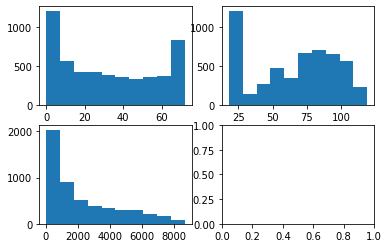

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2)

num_cols
counter = 0
for row in ax:
    for col in row:
        if counter < len(num_cols):
            col.hist(data[num_cols[counter]])
        counter+=1
        
plt.show()

(array([1207.,  142.,  267.,  479.,  350.,  663.,  713.,  659.,  573.,
         229.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

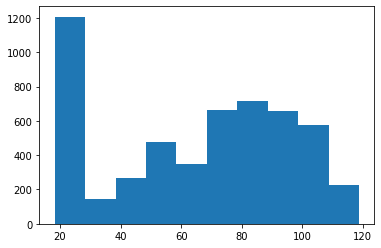

In [14]:
plt.hist(data.MonthlySpending)

(array([2037.,  901.,  510.,  392.,  343.,  308.,  305.,  222.,  172.,
          92.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

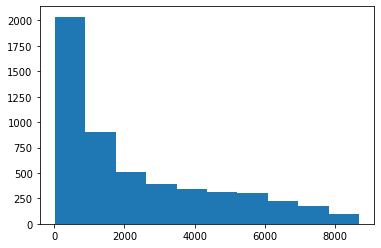

In [15]:
plt.hist(data.TotalSpent)

(array([1205.,  565.,  425.,  423.,  388.,  362.,  340.,  364.,  377.,
         833.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

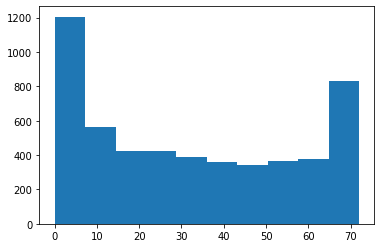

In [16]:
plt.hist(data.ClientPeriod)

In [17]:
cat_cols

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod']

Male      2655
Female    2627
Name: Sex, dtype: int64
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64
No     2705
Yes    2577
Name: HasPartner, dtype: int64
No     3676
Yes    1606
Name: HasChild, dtype: int64
Yes    4761
No      521
Name: HasPhoneService, dtype: int64
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64
No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64
No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAccess, dtype: int64
No    

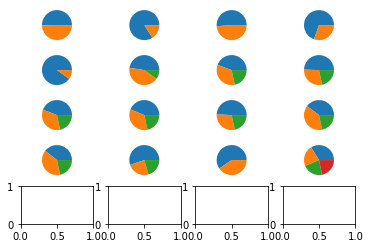

In [21]:
fig, ax = plt.subplots(nrows=5, ncols=4)

num_cols
counter = 0
for row in ax:
    for col in row:
        if counter < len(cat_cols):
            col.pie(data[cat_cols[counter]].value_counts())
            print(data[cat_cols[counter]].value_counts())
        counter+=1
        
plt.show()

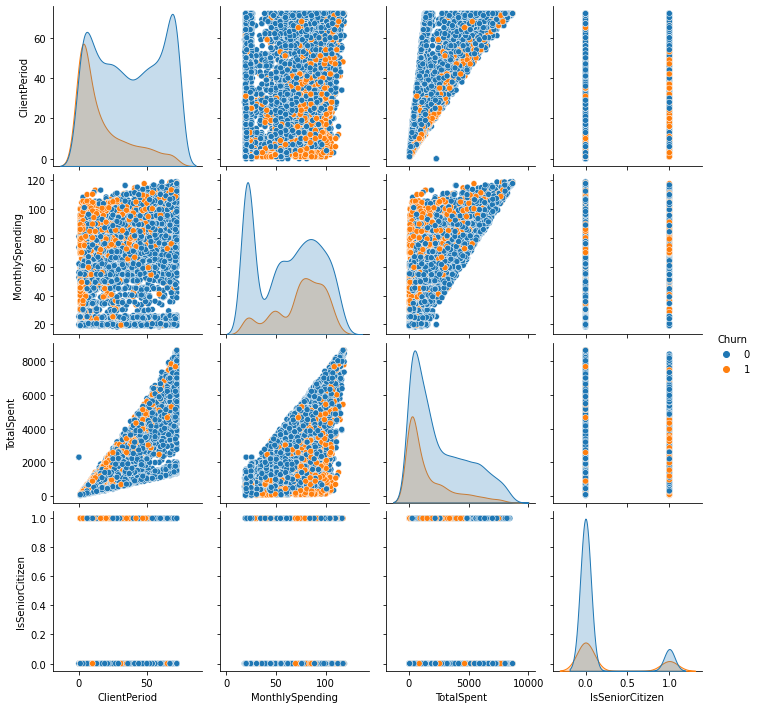

In [19]:
import seaborn as sns
sns.pairplot(data, hue='Churn')

plt.show()

([<matplotlib.patches.Wedge at 0x22a2073fc70>,
 [Text(-0.7478930722742168, 0.8066324766857788, ''),
  Text(0.7478930722742166, -0.8066324766857789, '')],
 [Text(-0.4079416757859364, 0.4399813509195156, '73.79780411720276'),
  Text(0.4079416757859363, -0.4399813509195157, '26.20219588279724')])

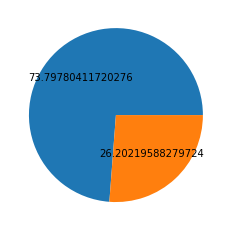

In [20]:
plt.pie(data.Churn.value_counts(),autopct = str)

### Классы являются сбалансированными. Соотношение классов примерно 1 к 3

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [21]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score

In [22]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)])


clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegressionCV(scoring='roc_auc',refit=True))])

X_train, X_test, y_train, y_test = \
    train_test_split(data[feature_cols], data[target_col], test_size=0.60,shuffle = True)

clf.fit(X_train, y_train)
preds_train = clf.predict_proba(X_train)[:, 1]
print(roc_auc_score(y_train,preds_train))
preds_test = clf.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test,preds_test))

0.8552413135022373
0.8405272368671243


In [23]:
preds_train

array([0.00383171, 0.10058657, 0.68211006, ..., 0.55067927, 0.46139796,
       0.67045265])

### При изменении параметров скор не очень сильно менялся, все оставалось в пределах 0.84

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [36]:
import catboost

In [37]:
X_train, X_test, y_train, y_test = \
    train_test_split(data[feature_cols], data[target_col], test_size=0.5,shuffle = True)

In [38]:
boostModel = catboost.CatBoostClassifier(n_estimators=130,cat_features=cat_cols,learning_rate=0.1)
boostModel.fit(X_train, y_train)
preds_train = boostModel.predict_proba(X_train)[:, 1]
preds_test = boostModel.predict_proba(X_test)[:, 1]

0:	learn: 0.6604378	total: 18.8ms	remaining: 2.42s
1:	learn: 0.6301686	total: 37.3ms	remaining: 2.38s
2:	learn: 0.6080130	total: 55ms	remaining: 2.33s
3:	learn: 0.5860512	total: 75.4ms	remaining: 2.37s
4:	learn: 0.5688603	total: 95.4ms	remaining: 2.38s
5:	learn: 0.5521721	total: 116ms	remaining: 2.4s
6:	learn: 0.5389007	total: 133ms	remaining: 2.33s
7:	learn: 0.5263572	total: 153ms	remaining: 2.33s
8:	learn: 0.5158220	total: 173ms	remaining: 2.33s
9:	learn: 0.5060458	total: 194ms	remaining: 2.32s
10:	learn: 0.4980538	total: 201ms	remaining: 2.17s
11:	learn: 0.4893196	total: 224ms	remaining: 2.2s
12:	learn: 0.4813875	total: 245ms	remaining: 2.2s
13:	learn: 0.4747145	total: 265ms	remaining: 2.19s
14:	learn: 0.4694291	total: 285ms	remaining: 2.19s
15:	learn: 0.4641449	total: 305ms	remaining: 2.17s
16:	learn: 0.4601023	total: 326ms	remaining: 2.17s
17:	learn: 0.4552754	total: 347ms	remaining: 2.16s
18:	learn: 0.4509946	total: 364ms	remaining: 2.13s
19:	learn: 0.4475108	total: 371ms	remaini

In [39]:
print(roc_auc_score(y_train,preds_train))
print(roc_auc_score(y_test,preds_test))

0.866316133662735
0.8527868893785756


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [40]:
boostModel = boostModel # какая-то предыдущая модель

In [45]:
X_test = pd.read_csv('./test.csv')
X_test.TotalSpent = pd.to_numeric(X_test.TotalSpent, errors='coerce')
X_test.TotalSpent=data.TotalSpent.fillna(0)
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv',index=False)

In [46]:
submission

,Id,Churn
0,0,0.013668
1,1,0.591372
2,2,0.581827
3,3,0.002668
4,4,0.010024
...,...,...
1756,1756,0.136200
1757,1757,0.100249
1758,1758,0.783777
1759,1759,0.441255


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.